<a href="https://colab.research.google.com/github/l0ngg/diveintocode/blob/master/mtfujiipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

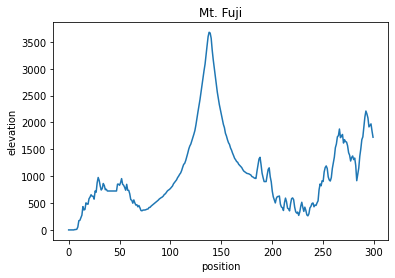

In [80]:
import numpy as np
import matplotlib.pyplot as plt
csv_path = "mtfuji_data.csv" # Specify the file name (path)
 
np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
 
#[Problem 1] Visualization of data
plt.plot( fuji[:,0] , fuji[:,3] )
plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation")
plt.show()

In [81]:
#[Problem 2] Create a function to calculate the slope of a point
def computeSlope(mount ,x = 1):
  # mount[x][3] : the y - elevation
  # mount[x][0] : the x - position
  return ( (mount[x][3] - mount[x-1][3]) / (mount[x][0] - mount[x-1][0]) )
 
print( computeSlope(fuji, 5) )
print( computeSlope(fuji, 6) )
print( computeSlope(fuji, 7) )
print( computeSlope(fuji, 8) )

0.0
6.62
0.5899999999999999
4.989999999999999


In [ ]:
##[Problem 3] Create a function to calculate the destination
def compute_destination(mount, current_point, alpha = 0.2):
  destination = current_point - (alpha * computeSlope(mount, current_point))
  if destination < 0:
    print("invalid destination")
    return
  return int(destination)
 
print( compute_destination(fuji, 136) )
print( compute_destination(fuji, 80) )
print( compute_destination(fuji, 102) )

102
79
97


In [82]:
#[Problem 4] Creating a function to go down the mountain
def going_down(mount, starting, alpha = 0.2):
  lst = []
  lst.append(starting)
  position = starting
  while position <= 299 and position > 0: 
    position = compute_destination(mount, position, alpha)
    if not position:
      return lst
    if position in lst:
      print('loop encountered')
      return lst
    lst.append(position)
  return lst
 
print("the path down the mountain {}".format(going_down(fuji, 136, 0.2)))

loop encountered
the path down the mountain [136, 102, 97, 91, 88, 84, 80, 79, 73, 70, 78, 77, 75, 74]


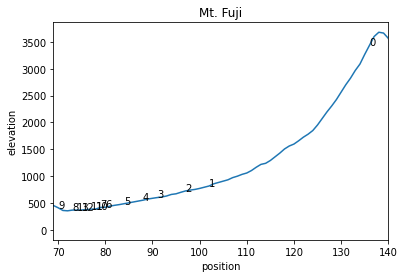

In [83]:
##[Problem 5] Visualization of the descent process
 
plt.plot( fuji[:,0] , fuji[:,3] )
plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation")
for i in range(len(lst)):
  plt.annotate('{}'.format(i),(lst[i], fuji[lst[i]][3]))
 
plt.xlim(69,140)
plt.show()

loop encountered


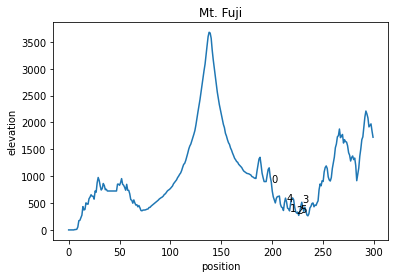

the path down the mountain [199, 217, 224, 229, 214, 227]


[199, 217, 224, 229, 214, 227]

In [86]:
##different starting point
def going_down_custom(mount, starting, alpha = 0.2):
  lst = []
  lst.append(starting)
  position = starting
  while position <= 299 and position > 0:
    position = compute_destination(mount, position, alpha)
    if not position:
      return lst
    if position in lst:
      print('loop encountered')
      break
    lst.append(position)
 
  plt.plot( fuji[:,0] , fuji[:,3] )
  plt.title("Mt. Fuji")
  plt.xlabel("position")
  plt.ylabel("elevation")
  for i in range(len(lst)):
    plt.annotate('{}'.format(i),(lst[i], fuji[lst[i]][3]))
 
  plt.show()
 
  print("the path down the mountain {}".format(lst))
  return lst
 
going_down_custom(fuji, 199)